In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
cf.go_offline()

%matplotlib inline

In [112]:
df = pd.read_csv("MENTAL HEALTH DATASET.csv ")

In [113]:
df.shape

(1259, 27)

In [114]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


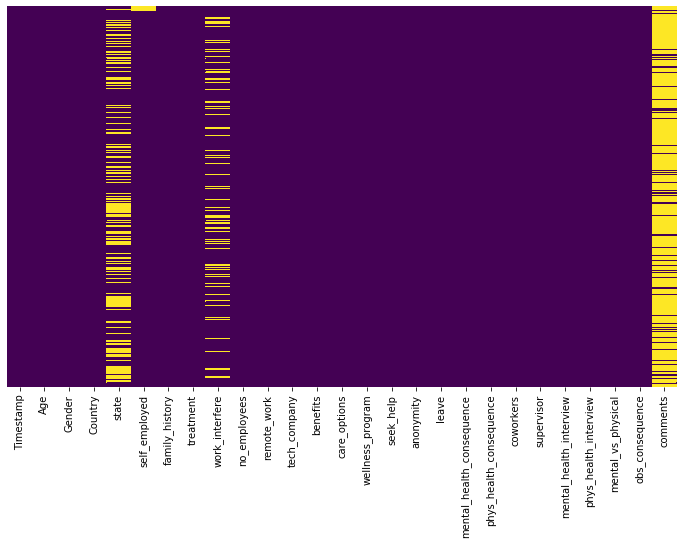

In [115]:
# Checking Null Values

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

No     1095
Yes     146
Name: self_employed, dtype: int64

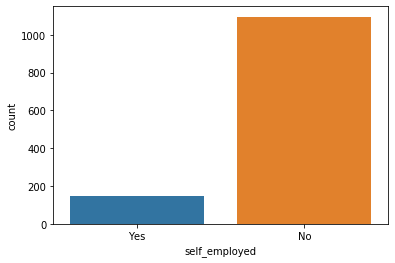

In [116]:
sns.countplot(x=df['self_employed'])
df['self_employed'].value_counts()



No     1113
Yes     146
Name: self_employed, dtype: int64

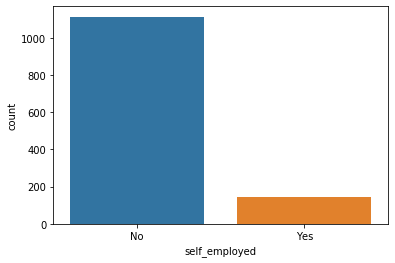

In [117]:
# replacing missing values with 'No' based on the most common answer for this question

df['self_employed'].replace(np.NaN,'No',inplace=True)

sns.countplot(x=df['self_employed'],)
df['self_employed'].value_counts()



Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

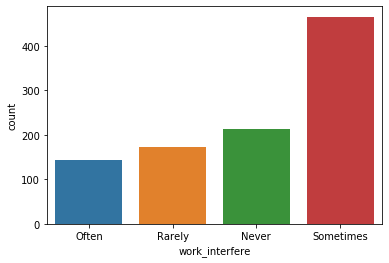

In [118]:
sns.countplot(x=df['work_interfere'])
df['work_interfere'].value_counts()


Sometimes       465
Not Answered    264
Never           213
Rarely          173
Often           144
Name: work_interfere, dtype: int64

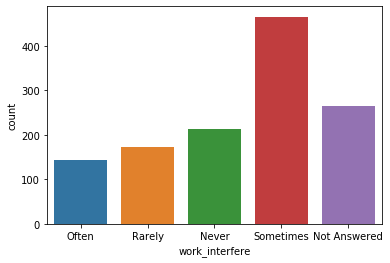

In [119]:
# Replacing missing values with 'Not Answered' as its answer would depend on personal experience

df['work_interfere'].replace(np.NaN,'Not Answered',inplace=True)

sns.countplot(x=df['work_interfere'])
df['work_interfere'].value_counts()

In [120]:
# Dropping 'state' and 'comments' columns from df as there's no way to impute their missing values. Also dropping 'Timestamp'

df.drop(['Timestamp','state','comments'],axis=1,inplace=True)

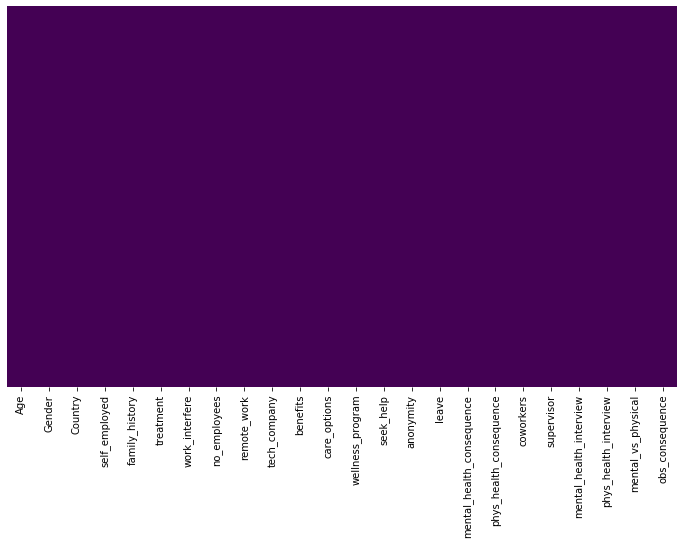

In [121]:
# Checking Null Values Again

plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

In [122]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female                                              2
Man                                                 2
Female (trans)                                      2
cis male                                            1
Nah                                                 1
A little about you                                  1
Mail                        

In [123]:
# Correcting Gender Field

m_list=['Male','male','M','m','Cis Male','cis male','Man','man']
f_list=['Female','female','F','f','Cis Female','cis female','Woman','woman']

def get_gender(g):
    if str(g) in m_list:
        return 'Male'
    elif str(g) in f_list:
        return 'Female'
    else:
        return 'Others'
    
df['Gender'] = df['Gender'].apply(get_gender)


In [124]:
df.Gender.value_counts()

Male      976
Female    241
Others     42
Name: Gender, dtype: int64

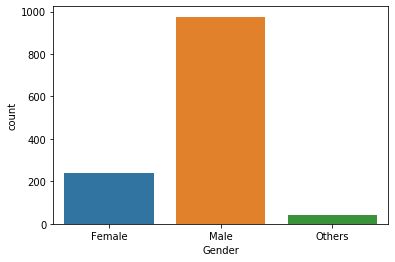

In [125]:
sns.countplot(df['Gender'])

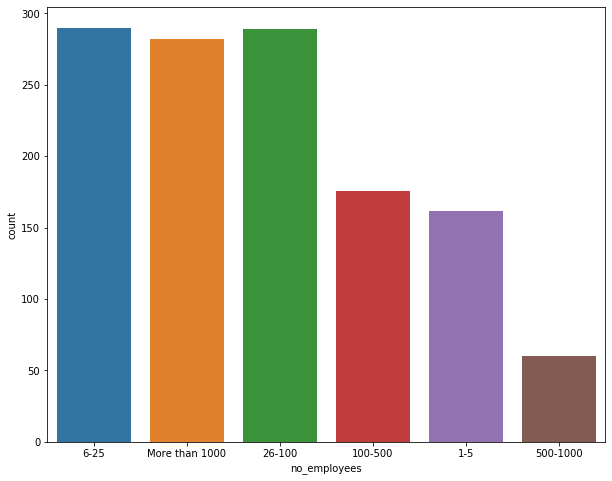

In [135]:
plt.figure(figsize=(10,8))
sns.countplot(df['no_employees'])

# Summary Table and Values of given Categorical Variable

In [169]:
# Summary

col = "Country"   # Enter Column Name Here 

summary = df.groupby(col).count()
summary

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Country,,,,,,,,,,,,,,,,,,,,,
Australia,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Austria,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
"Bahamas, The",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Belgium,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Bosnia and Herzegovina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Brazil,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Bulgaria,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Canada,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
China,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [161]:
Male_Summary = df[df.Gender=='Male'].groupby(['Country']).count()
Male_Summary

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Country,,,,,,,,,,,,,,,,,,,,,
Australia,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Austria,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Belgium,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Bosnia and Herzegovina,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Brazil,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Bulgaria,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
China,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Colombia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [162]:
Female_Summary = df[df.Gender=='Female'].groupby(['Country']).count()
Female_Summary

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Belgium,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bulgaria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Canada,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Germany,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Hungary,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
India,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Ireland,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Israel,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [170]:
df.to_csv('MKR_Mental Health.csv')